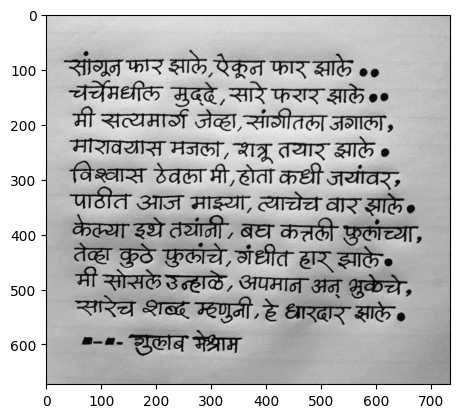

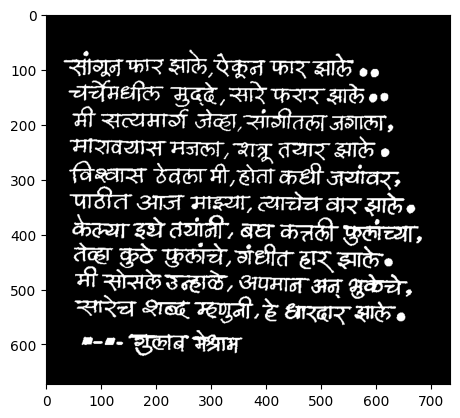

No valid table detected. Falling back to normal text extraction.
Extracted Text:
सोगून फार झाठे,ऐकून फार झाळे «०,
चरचॅमधीक मुद्ढे, सारे फरार झाळे ७७
मी र्‍सत्यमार्ज जेव्हा,र्‍सीजीतळा जञाठा,
मारावयास मजला, दाव्रू तयार झाळे ७
'विशञास ठेवळा मी,होता कधी जयावर;
"पाठीत आज माझ्या; त्याचेच वार झालि «
केल्या इथ्रे तयाती, बघ कतठी फुलांच्या,
तेव्हा कुठे फुलांचे, गंध्यीत॑ हार झाठे'
मी ऱ्सोसळे उन्हाळे, अपमान अन्‌ धरुकेचे,
सारेच शब्द म्दणुनी, छे धारदार झाले «
»-५- कांब मेश्राम



In [5]:
import numpy as np
import cv2
import pytesseract
import pandas as pd
import matplotlib.pyplot as plt

def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV)
    plt.imshow(gray, cmap='gray')
    plt.show()
    plt.imshow(thresh, cmap='gray')
    plt.show()
    return image, thresh

def detect_table_cells(thresh):
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 50))
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))
    vertical_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
    horizontal_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)

    grid = cv2.add(vertical_lines, horizontal_lines)

    contours, _ = cv2.findContours(grid, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cells = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 20 and h > 20:  # Filter small elements
            cells.append((x, y, w, h))
    return sorted(cells, key=lambda c: (c[1], c[0]))  # Sort by row, then column

def extract_text_from_cells(image, cells):
    text_data = []
    for x, y, w, h in cells:
        roi = image[y:y+h, x:x+w]
        text = pytesseract.image_to_string(roi, lang='mar')
        print(text)
        text_data.append(text.strip())
    return text_data

def reconstruct_table(text_data, cells):
    rows = []
    current_row = []
    last_y = cells[0][1] if cells else 0

    for i, cell in enumerate(cells):
        x, y, w, h = cell
        if abs(y - last_y) > 10:  # New row detected
            rows.append(current_row)
            current_row = []
            last_y = y
        current_row.append(text_data[i])
    if current_row:
        rows.append(current_row)  # Add the last row
    return rows

def extract_text(image):
    text = pytesseract.image_to_string(image, lang='mar')
    print("Extracted Text:")
    print(text)
    return text

def process_table(image_path, output_csv="output_table.csv"):
    image, thresh = preprocess_image(image_path)
    cells = detect_table_cells(thresh)

    if not cells or len(cells) < 3:  # No table detected or table has fewer than 3 columns
        print("No valid table detected. Falling back to normal text extraction.")
        extract_text(image)
        return

    text_data = extract_text_from_cells(image, cells)
    table_data = reconstruct_table(text_data, cells)

    max_cols = max(len(row) for row in table_data)
    table_df = pd.DataFrame(table_data, columns=[f"Col {i+1}" for i in range(max_cols)])
    table_df.to_csv(output_csv, index=False)
    
    num_rows = len(table_data)
    print("Number of rows in the table:", num_rows)
    print("Number of columns in the table:", max_cols)
    
    print("Table saved to", output_csv)
    print(table_df)

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
process_table("sample049.png")


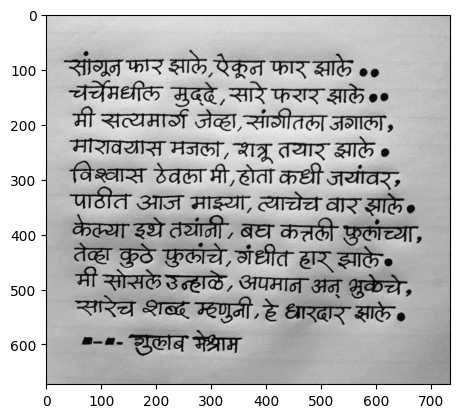

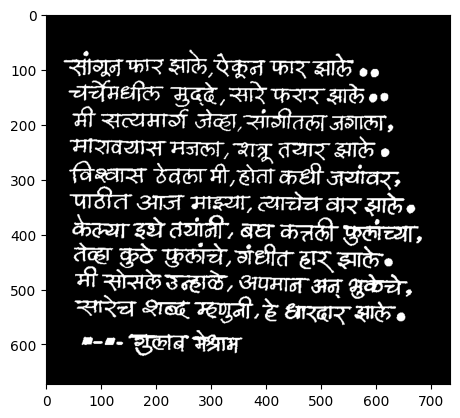

No valid table detected. Extracting and translating entire text.
Extracted Marathi Text:
सोगून फार झाठे,ऐकून फार झाळे «०,
चरचॅमधीक मुद्ढे, सारे फरार झाळे ७७
मी र्‍सत्यमार्ज जेव्हा,र्‍सीजीतळा जञाठा,
मारावयास मजला, दाव्रू तयार झाळे ७
'विशञास ठेवळा मी,होता कधी जयावर;
"पाठीत आज माझ्या; त्याचेच वार झालि «
केल्या इथ्रे तयाती, बघ कतठी फुलांच्या,
तेव्हा कुठे फुलांचे, गंध्यीत॑ हार झाठे'
मी ऱ्सोसळे उन्हाळे, अपमान अन्‌ धरुकेचे,
सारेच शब्द म्दणुनी, छे धारदार झाले «
»-५- कांब मेश्राम

Translated Text: थोड़ा, बहुत सारे खजाने सुनकर «1,
विदेशी मुद्दे, सभी फरार झोंस
जब मैं संयम हूं, तो रिसजिताला जत्था,
फर्श को मारने के लिए, दावारू तैयार
'मैं था, मैं था, जब मैं था, जया;
"आज पीठ में, मेरी; वह उसकी मारा गया था
यहाँ लिया गया, फूलों, फूलों के फूलों को देखो,
तो फूल कहाँ है, हार।
मैं गर्मियों, अपमान और धर्मक हूं,
सभी शब्द, मंडुनी, तीक्ष्णता तेज हो गई
»-1- काम माश्रम

Translated Full Text:
थोड़ा, बहुत सारे खजाने सुनकर «1,
विदेशी मुद्दे, सभी फरार झोंस
जब मैं संयम हूं, तो रिसजिताला जत्था,
फर्श को मारने के लिए, द

In [13]:
import numpy as np
import cv2
import pytesseract
import pandas as pd
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator  # Deep Translator for Marathi to Hindi translation

def preprocess_image(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    _, thresh = cv2.threshold(gray, 127, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV)
    plt.imshow(gray, cmap='gray')
    plt.show()
    plt.imshow(thresh, cmap='gray')
    plt.show()
    return image, thresh

def detect_table_cells(thresh):
    vertical_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 50))
    horizontal_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))
    vertical_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, vertical_kernel, iterations=2)
    horizontal_lines = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, horizontal_kernel, iterations=2)

    grid = cv2.add(vertical_lines, horizontal_lines)

    contours, _ = cv2.findContours(grid, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cells = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        if w > 20 and h > 20:  # Filter small elements
            cells.append((x, y, w, h))
    return sorted(cells, key=lambda c: (c[1], c[0]))  # Sort by row, then column

def extract_text_from_cells(image, cells):
    text_data = []
    for x, y, w, h in cells:
        roi = image[y:y+h, x:x+w]
        text = pytesseract.image_to_string(roi, lang='mar')
        print(f"Extracted Marathi Text: {text}")
        text_data.append(text.strip())
    return text_data

def translate_text(text):
    try:
        translated_text = GoogleTranslator(source="marathi", target="hindi").translate(text)
        print(f"Translated Text: {translated_text}")
        return translated_text
    except Exception as e:
        print(f"Translation Error: {e}")
        return "Translation Error"

def reconstruct_table(text_data, cells):
    rows = []
    current_row = []
    last_y = cells[0][1] if cells else 0

    for i, cell in enumerate(cells):
        x, y, w, h = cell
        if abs(y - last_y) > 10:  # New row detected
            rows.append(current_row)
            current_row = []
            last_y = y
        current_row.append(text_data[i])
    if current_row:
        rows.append(current_row)  # Add the last row
    return rows

def extract_text(image):
    text = pytesseract.image_to_string(image, lang='mar')
    print("Extracted Marathi Text:")
    print(text)
    return text

def process_table(image_path, output_csv="output_table.csv"):
    image, thresh = preprocess_image(image_path)
    cells = detect_table_cells(thresh)

    if not cells or len(cells) < 3:  # No table detected or table has fewer than 3 columns
        print("No valid table detected. Extracting and translating entire text.")
        full_text = extract_text(image)
        translated_text = translate_text(full_text)
        print("\nTranslated Full Text:")
        print(translated_text)
        return

    text_data = extract_text_from_cells(image, cells)
    translated_data = [translate_text(text) for text in text_data]  # Translate each cell's text

    table_data = reconstruct_table(text_data, cells)
    translated_table_data = reconstruct_table(translated_data, cells)

    max_cols = max(len(row) for row in table_data)
    table_df = pd.DataFrame(table_data, columns=[f"Marathi Col {i+1}" for i in range(max_cols)])
    translated_df = pd.DataFrame(translated_table_data, columns=[f"Hindi Col {i+1}" for i in range(max_cols)])

    # Merge Marathi and Hindi tables side by side
    combined_df = pd.concat([table_df, translated_df], axis=1)
    combined_df.to_csv(output_csv, index=False)

    num_rows = len(table_data)
    print("Number of rows in the table:", num_rows)
    print("Number of columns in the table:", max_cols)

    print("Table saved to", output_csv)
    print(combined_df)

# Specify the Tesseract executable path
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Process the image
process_table("sample049.png")
